# Solving Common Introductory Quantum Mechanics Problems using Sympy

Adapted from work of E. Harvey [JCE Symmath](http://www.chemeddl.org/alfresco/service/org/chemeddl/symmath/frameset?guest=true) (accessed 2019-09).


This notebook show basic examples for quantum calculations encountered in undergraduate physical chemistry course. The purpose of this notebook is not to explain the theory behind the calculations, bur rather show how python can be used for solving typical problems.

This notebook assumes [sympy](http://sympy.org) is available and some familiarity with python lists and functions. The [sympy tutorial](http://docs.sympy.org/latest/tutorial/index.html) describes all of the functions used in the notebook.

## Objectives

After completing this work you should be able to use python and sympy to
1. calculate a normalization constant
2. calculate an expectation value and its variance
2. determine whether a function is an eigenvalue of an operator
3. determine if functions are orthogonal

## Prerequisites
- basic knowledge of python and sympy
- the python [SciPy](http://www.scipy.org) stack
- the python [sympy](http://www.sympy.org) symbolic computation library
- basic understanding of eigenfuctions, normalization, orthogonality, and expectation values

## Python environment
First, import libaries and initialize sympy's 'pretty' printing.

In [1]:
# import and initialize libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sympy import *

# uncomment one of these and comment the other
init_printing() # jupyter, cocalc
#init_printing(use_latex=False) # colaboratory

## General properties of wavefunctions

Remind yourself of some key properties of wavefunctions. These properties (sometimes call Born's conditions) are generally found in a discussion on the postulates of quantum mechanics.  

### Your Turn
List as many properties of wavefunctions as you can and give a brief summary of the meaning of the property (one is given as an example)

(double click this cell to add answers...)

1. A wavefunction must be single-valued. This means that $\psi(x)$ must have a unique value for any value of x. 

2.  

3.  

4.  

## Normalizing functions
One of the postulates of quantum mechanics states we can calculate the probability of finding an electron in space if the wavefunction is known. The *normalization condition* must be satisfied:
$$ \int_{0}^a \psi(x)^* \psi(x)\; dx = 1 $$

We start with a simple function representing the wavefunction of a particle

$$ f(x) = N_0 e^{-ax^2/2} $$

where $N_0$ and $a_0$ are constants.

Start by identifying the variables in the function. We also include sensible assumptions about certain variables if they are known. This is not necessary, but allows us to disregard physically impossible results (and speed up some computations).

In [2]:
a, x, N0 = symbols('a x N0', positive=True)

f = E**(-a * x**2 / 2)
f

Define a wavefunction $\psi(x)$ using `f` and a normalization constant.

In [3]:
psi = N0 * f
psi

sympy's `conjugate()` gives the complex conjugate. Because `psi(x)` is real, its complex conjugate is the same function.

In [4]:
# sympy conjugate() gives the complex conjugate of a function
psi_star = conjugate(psi)
psi, psi_star

### python interlude: complex numbers in sympy and python
In python, complex numbers (those related to $\sqrt{-1}$, the [imaginary unit](https://en.wikipedia.org/wiki/Imaginary_unit)) and $e^x$ can be entered in different ways. If `sympy` is loaded, `I` is the imaginary unit and `E` is the Euler $e$. In 'plain' python these are `1j` and `exp()`. For example $e^{ix}$ can be entered as:

- `E**(I*x)` or `exp(I*x)` if sympy has been loaded

- `exp((1j * x))` if using 'plain' python

If in doubt, use the `type()` function to see what the computer thinks you're using:

In [5]:
type(I)

sympy.core.numbers.ImaginaryUnit

In [6]:
type(1j)

complex

### Your Turn
Enter an expression for a complex function. Use the `conjugate()` function to compute the complex conjugate. Then multiply the expression and its conjugate. Print all three.

In [7]:
# solution
psij = x**2 * E**(1j*x)
psijc = conjugate(psij)
psij, psijc, psij*psijc

To determine $N_0$, integrate over the domain space. In this case, $-\infty$ to $\infty$, represented in sympy by `-oo` and `oo` (two lowercase letter o ; which look similar to the infinity glyph).

In [8]:
# 'prob' is short for 'probability'
prob = integrate(psi * psi_star, (x, -oo, oo))
prob

Solve the equation 

$$ \int_{-\infty} ^{\infty} \psi(x)^* \psi(x) dx = 1$$ 

for $N_0$. The symbolic solver in sympy equates an expression to zero, and then solves for a variable. We need to rearrange the equation to

$$ \int_{-\infty} ^{\infty} \psi(x)^* \psi(x) dx - 1 = 0$$

In [9]:
solve(prob - 1, N0)

Although there is only one solution, the brackets tell us sympy returned a list. This is handy if more than one solution exists. To use the normalization constant later, assign the name `norm` to the first (and only) entry in the solution list. Remember, python lists are zero-indexed.

In [10]:
norm = solve(prob -1, N0)[0]
norm

Verify that the normlization constant is correct by substituting `norm` for $N_0$ in the expression for `prob`.

In [11]:
prob.subs(N0,norm)

It is useful to use 'actual' numbers and verify the symbolic result.

Assign a numeric value to $a$ (let's use 3), and repeat the process. Use `.evalf()` method, or the `N()` function to get numeric results from symbolic expressions. (Recall, $f$ was the unormalized function.)

In [12]:
f

In [13]:
psi = (norm * f).subs(a,3)
psi_star = conjugate(psi)
prob = integrate (psi*psi_star, (x,-oo, oo))
prob

Suppose we want the probability for $0 \le x \le 1$?

In [14]:
# N gives numeric (floating point) result
N(integrate(psi*psi_star, (x, 0, 1)))

# Plot the wavefunction and probability amplitude

Sympy takes a different approach to plotting than matplotlib/pyplot. The sympy plotting functions generally produce figures that look more like those from "math books".  For example, axis origin is a the center of a figure rather than the lower left corner.  Sympy also assumes a plot range of -1 < x < 1 unless told otherwise. 

Use sympy to plot $\psi$ and $\psi^* \psi$, the normalized wavefunctions.

In [15]:
# subs = substitute values for variables
# Use a dictionary or list for multiple substitutions

psi = psi.subs( {a:3, N0:norm} )
psi_star = psi_star.subs( [(a,3), (N0,norm)] )

In [16]:
psi

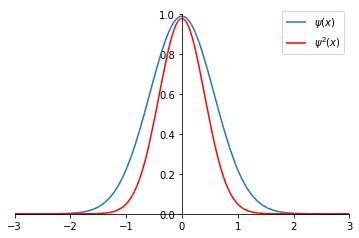

In [17]:
p1 = plot(psi, (x, -3, 3), show=False)
p1[0].label='$\psi(x)$'
p1.xlabel=''
p1.ylabel=''
p1.legend=True

p2 = plot(psi**2, (x,-3,3), line_color='r', show=False)
p2[0].label='$\psi^2(x)$'

p1.extend(p2)
p1.show()

The probability amplitude, $\psi^2$ has a narrower shape. Is $\psi$ normlized?

# Calculating probability of finding a particle in a specified region
Calculate the probability of finding a particle described by the function in a
specified region that can be easily changed. We'll start with x1 = 0 and x2 = 0.5.

In [18]:
x1, x2 = 0, 0.5

integrate(psi*psi_star,(x, x1, x2)).evalf()

This process might be repeated frequently. If so, it's probably worth defining in the form of a python function.

In [19]:
# default limits of infinity are provided, but can be overridden
def prob_func(f, x_lower=-oo, x_upper=oo):
    'integrate the normalized wavefunction f(x) from x_l to x_u'
    
    fstar = conjugate(f)
    prob = integrate(fstar * f, (x, x_lower, x_upper))
    return prob

Print the probability over 10 intervals within the box.

In [20]:
psi = psi.subs({a:1, N0:norm})
lengths = [l/10 for l in range(0, 11)]
print("Probability over intervals")
print(lengths)
for l in lengths:
    print(prob_func(psi, 0, l).evalf())

Probability over intervals
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0
0.0967520297463300
0.187896942616797
0.268783636774762
0.336406561104847
0.389664319040077
0.429177654852432
0.456794633513150
0.474978239375647
0.486256831944245
0.492847060782285


# Calculate average values
The expectation value $\langle a \rangle$ for an observable or property is calculated by finding the operator that describes that observable, finding a normalized wavefunction that describes the system under consideration, and using the integral definition for expectation value:

$$ \langle a \rangle = \int \psi^*(x)\, \hat{A}\, \psi(x)\ dx $$ 

The position operator is $\hat{x} = x$; just multiplication by $x$. In our example, the range for $x$ is $-\infty$ to $\infty$, so the average (or *expectation*) value might be predictable looking at the symmetry of the probability plot. 

In [21]:
x_avg = integrate(psi_star * x * psi, (x, -oo, oo))
x_avg

# Calculate an uncertainty (standard deviation and variance) in the expectation value for position
Variance in a quantity can be calculated simply as the expectation value for the quantity squared (position squared in this case, $\langle x^2\rangle$) minus the (expectation value for the quantity)-squared ($\langle x \rangle^2$ in this case.)

$$\sigma^2 = \int \psi^*\, x^2\, \psi\; dx - \left ( \int \psi^*\, x\, \psi \;dx \right )^2 $$

In [22]:
sigma_squared = integrate(psi_star * x**2 * psi, (x,-oo,oo)) - (integrate(psi_star*x*psi, (x,-oo,oo)))**2

In [23]:
sqrt(sigma_squared).evalf()

# Is a wavefunction an eigenfunction of an operator?
Eigenfunctions of an operator have the property

$$ \hat{A}f = a f$$

where $a$ is the eigenvalue.

See if the function $\psi(x)=\exp(-a_0 x^2/2)$ is an eigenfunction of the kinetic energy operator $$\hat{T} = \frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} $$

In [24]:
# this could be done as an expression, but seems a natural for python function
def T_hat(f):
    "Apply the kinetic energy operator T on function f(x)"
    hbar, m = symbols('hbar m')
    return hbar**2 /(2*m) * diff(f, x, 2)

In [25]:
psi = N0 * exp(-a*x**2/2)

In [26]:
T_hat(psi)

`T_hat()` returned the result of operating on $\psi$. If $\psi$ is an eigenfunction, we should be able to factor this result into $a\psi$ where $a$ is the eigenvalue. Another approach would be to divide both sides by the function and see if the result is a constant.
$$\frac{\hat{A}f}{f} = a$$

In [27]:
T_hat(psi)/psi

Because this result contains $x^2$, it is not a constant. Therefore, $\psi$ is not an eigenfunction of the kinetic energy operator $\hat{T}$. 

How about $\cos(x)$?

In [28]:
T_hat(cos(x))

So, $\cos(x)$ is indeed an eigenfunction of $\hat{T}$ and the eigenvalue is $-\hbar^2/2m$. However, $\cos(x)$ is not a valid wavefunction for the particle-in-a-box model.  Why not?

# Is a function orthogonal to another function?

The functions
 
$$\phi_n(\theta) = e^{in\theta} $$

where $n$ is an integer and $0 \le \theta \le 2\pi$ are orthogonal if 

$$\int_0^{2\pi} \phi_n^*(\theta) \phi_m^*(\theta)\; d\theta = 0 $$
for $m\ne n$.

In [29]:
var('theta n', real=True)
def phi(n): 
    return exp(I*n*theta)

In [30]:
integrate(conjugate(phi(1)) * phi(0), (theta, 0, 2*pi))

$\phi_1$ and $\phi_2$ are orgthogonal.

### Your Turn
Are the $\phi_n(\theta)$ wavefunctions normlized? If not, how could you normalize them? Try it.

### Python interlude: range() and loops
Using loops can make quick work of iterating over many combinations. (NB: This is a silly example, as it only shows a pattern for a few specific cases; orthogonality is not proven in general)

In [31]:
print("m, n, integral\n", 20*"-")
for n in range(0,4):
    for m in range(0,4):
        result = integrate(conjugate(phi(m)) * phi(n), (theta, 0, 2*pi))
        pprint((m, n, result))

m, n, integral
 --------------------
(0, 0, 2⋅π)
(1, 0, 0)
(2, 0, 0)
(3, 0, 0)
(0, 1, 0)
(1, 1, 2⋅π)
(2, 1, 0)
(3, 1, 0)
(0, 2, 0)
(1, 2, 0)
(2, 2, 2⋅π)
(3, 2, 0)
(0, 3, 0)
(1, 3, 0)
(2, 3, 0)
(3, 3, 2⋅π)


# Finis